In [2]:
# incomeMapping.ipynb
# August 2022

# Given census data and a list of gas meter IDs corresponding to houses, produces a mapping for each
# meter ID to the corresponding income tract (low, medium, or high).

# Original Paper Reference:
'''
Adam Lechowicz, Noman Bashir, John Wamburu, Mohammad Hajiesmaili, and Prashant Shenoy
Equitable Network-Aware Decarbonization of Residential Heating at City Scale
ACM International Conference on Future Energy Systems (e-Energy), 2023.
'''

import pandas as pd
import math

In [3]:
# reads csv that contains a mapping from each meter ID to the corresponding census block
df = pd.read_csv('census_data/meter-block-data.csv')

In [5]:
# reads csv with information about each census block
dfr = pd.read_csv('census_data/block-demographic-data.csv')

<AxesSubplot:ylabel='Frequency'>

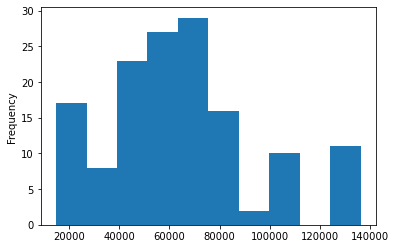

In [7]:
dfr["median_income"].plot(kind="hist")

In [46]:
# bucket each block into one of three income tracts (low, med, high)
# low = 1, med = 2, high = 3
bucketing = {}
low = 0
med = 0
high = 0
for block, income in zip(dfr["block_code"], dfr["median_income"]):
    if income < 45000:
        bucketing[block] = 1
        low += 1
    elif income > 80000:
        bucketing[block] = 3
        high += 1
    else:
        bucketing[block] = 2
        med += 1

In [47]:
# print out the number of blocks in each income tract
print(low)
print(med)
print(high)

43
57
43


In [ ]:
meterIDs = df["GASMETERID"]
block_codes = df["block_code"]

# create a dictionary that stores the block code for each meterID
dict = {}
for ID, code in zip(meterIDs, block_codes):
    if math.isnan(ID):
        continue
    dict[int(ID)] = bucketing[code]

In [49]:
low = 0
med = 0
high = 0
# print out the number of houses in each income tract
for code in dict.values():
    if code == 1:
        low += 1
    elif code == 2:
        med += 1
    else:
        high +=1

print(low)
print(med)
print(high)

3488
3427
3440


In [74]:
import pickle

# store the computed mapping in a pickle file, to be used elsewhere
pickle.dump( dict, open( "incomeMapping.pickle", "wb" ) )